# Tugas Prapraktikum

Tugas Prapraktikum dikerjakan dengan _dataset_ [Rain in Australia](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/download?datasetVersionNumber=2). Tanpa meninjau waktu (`date`), prediksi status hujan pada keesokan harinya (`RainTomorrow`). Berikan nilai `1` jika diprediksi hujan pada keesokan harinya, `0` jika tidak.

<br>
Tugas dikerjakan secara berkelompok. Setiap kelompok terdiri atas 2 (dua) mahasiswa. Kumpulkan paling lambat pada Minggu, 16 April 2023, pukul 23:59 WIB melalui Edunex.

# 0. Persiapan Data and Pustaka

In [ ]:
# Bagian ini dapat diabaikan apabila library telah diinstall
!python -m pip install pandas matplotlib seaborn numpy sklearn imblearn

In [47]:
# Letakkan pustaka di sini.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

SEED = 42

In [20]:
# Baca data di sini.
df = pd.read_csv(r'weatherAUS.csv')

# I. Pemahaman Data
Tujuan dari bagian ini adalah peserta dapat memahami kualitas dari data yang diberikan. Hal yang diliputi adalah sebagai berikut:
1. Ukuran data
2. Statistik dari tiap fitur
3. Pencilan (_outlier_)
4. Korelasi
5. Distribusi 

## I.1 
Carilah:
1. Ukuran dari data (instansi dan fitur)
2. Tipe dari setiap fitur 
3. Banyak nilai unik dari fitur yang bertipe kategorikal
4. Nilai minimum, maksimum, rata-rata, median, dan standar deviasi dari fitur nonkategorikal

1. Ukuran dari data (instansi dan fitur)

In [48]:
# I.1.1 Ukuran Instances dan Attributes
pd.DataFrame({
    'Instance': [df.shape[0]],
    'Attribute': [df.shape[1]],
}, index=["Amount"]).T

,Amount
Instance,145460
Attribute,23


2. Tipe dari setiap fitur 

In [49]:
# create dataframe for each attribute data types with one example from data
pd.DataFrame({
    'Type': df.dtypes,
    'Example': df.sample(1, random_state=SEED).values[0]
})

,Type,Example
Date,object,2012-04-22
Location,category,MountGambier
MinTemp,float64,15.0
MaxTemp,float64,18.9
Rainfall,float64,4.2
Evaporation,float64,6.6
Sunshine,float64,8.0
WindGustDir,category,NNW
WindGustSpeed,float64,54.0
WindDir9am,category,NNW


In [50]:
# Convert object datatype to category to minimize memory overhead
df = df.astype({
    'Location': 'category',
    'WindGustDir': 'category',
    'WindDir9am': 'category',
    'WindDir3pm': 'category',
    'RainToday': 'category',
    'RainTomorrow': 'category',
})


3. Banyak nilai unik dari fitur yang bertipe kategorikal

In [51]:
# Unique value amount for category columns
pd.DataFrame({
    'Unique Value': df.select_dtypes('category').nunique()
})

,Unique Value
Location,49
WindGustDir,16
WindDir9am,16
WindDir3pm,16
RainToday,2
RainTomorrow,2


4. Nilai minimum, maksimum, rata-rata, median, dan standar deviasi dari fitur nonkategorikal

In [52]:
# Get min, max, mean, median, and std for numerical columns
pd.DataFrame({
    'Min': df.select_dtypes('number').min(),
    'Max': df.select_dtypes('number').max(),
    'Mean': df.select_dtypes('number').mean(),
    'Median': df.select_dtypes('number').median(),
    'Std': df.select_dtypes('number').std(),
})

,Min,Max,Mean,Median,Std
MinTemp,-8.5,33.9,12.194034,12.0,6.398495
MaxTemp,-4.8,48.1,23.221348,22.6,7.119049
Rainfall,0.0,371.0,2.360918,0.0,8.478060
Evaporation,0.0,145.0,5.468232,4.8,4.193704
Sunshine,0.0,14.5,7.611178,8.4,3.785483
WindGustSpeed,6.0,135.0,40.035230,39.0,13.607062
WindSpeed9am,0.0,130.0,14.043426,13.0,8.915375
WindSpeed3pm,0.0,87.0,18.662657,19.0,8.809800
Humidity9am,0.0,100.0,68.880831,70.0,19.029164
Humidity3pm,0.0,100.0,51.539116,52.0,20.795902


## I.2
Carilah:
1. Nilai hilang (_missing_) dari setiap fitur
2. Nilai pencilan (_outlier_) dari setiap fitur

1. Nilai hilang (_missing_) dari setiap fitur 

    Sorted descending based on Missing Percentage respective to the total number of instances

In [53]:
pd.DataFrame({
    'Missing Value': df.isna().sum(),
    'Missing (%)' : np.round(df.isna().sum() / df.shape[0] * 100, 1)
}).sort_values(by='Missing Value', ascending=False)

,Missing Value,Missing (%)
Sunshine,69835,48.0
Evaporation,62790,43.2
Cloud3pm,59358,40.8
Cloud9am,55888,38.4
Pressure9am,15065,10.4
Pressure3pm,15028,10.3
WindDir9am,10566,7.3
WindGustDir,10326,7.1
WindGustSpeed,10263,7.1
Humidity3pm,4507,3.1


2. Nilai pencilan (_outlier_) dari setiap fitur

    Using Interquartile Range (IQR) method

In [54]:
def iqr(x):
    return x.quantile(0.75) - x.quantile(0.25)

# Get IQR for numerical columns
col_iqr = pd.DataFrame({
    'IQR': df.select_dtypes('number').apply(iqr)
})

# Get outlier threshold for numerical columns
col_iqr['Bottom Threshold'] = df.select_dtypes('number').quantile(0.25) - (1.5 * col_iqr['IQR'])
col_iqr['Top Threshold'] = df.select_dtypes('number').quantile(0.75) + (1.5 * col_iqr['IQR'])

# Get outlier amount for numerical columns
col_iqr['Outlier Amount'] = df.select_dtypes('number').apply(lambda x: x[(x < col_iqr.loc[x.name, 'Bottom Threshold']) | (x > col_iqr.loc[x.name, 'Top Threshold'])].count())

col_iqr.sort_values(by='Outlier Amount', ascending=False)

,IQR,Bottom Threshold,Top Threshold,Outlier Amount
Rainfall,0.8,-1.20,2.00,25578
WindGustSpeed,17.0,5.50,73.50,3092
WindSpeed3pm,11.0,-3.50,40.50,2523
Evaporation,4.8,-4.60,14.60,1995
WindSpeed9am,12.0,-11.00,37.00,1817
Humidity9am,26.0,18.00,122.00,1425
Pressure9am,9.5,998.65,1036.65,1191
Pressure3pm,9.6,996.00,1034.40,919
Temp3pm,9.8,1.90,41.10,764
MaxTemp,10.3,2.45,43.65,489


Outliers Plotting (with Boxplot) for each numerical feature

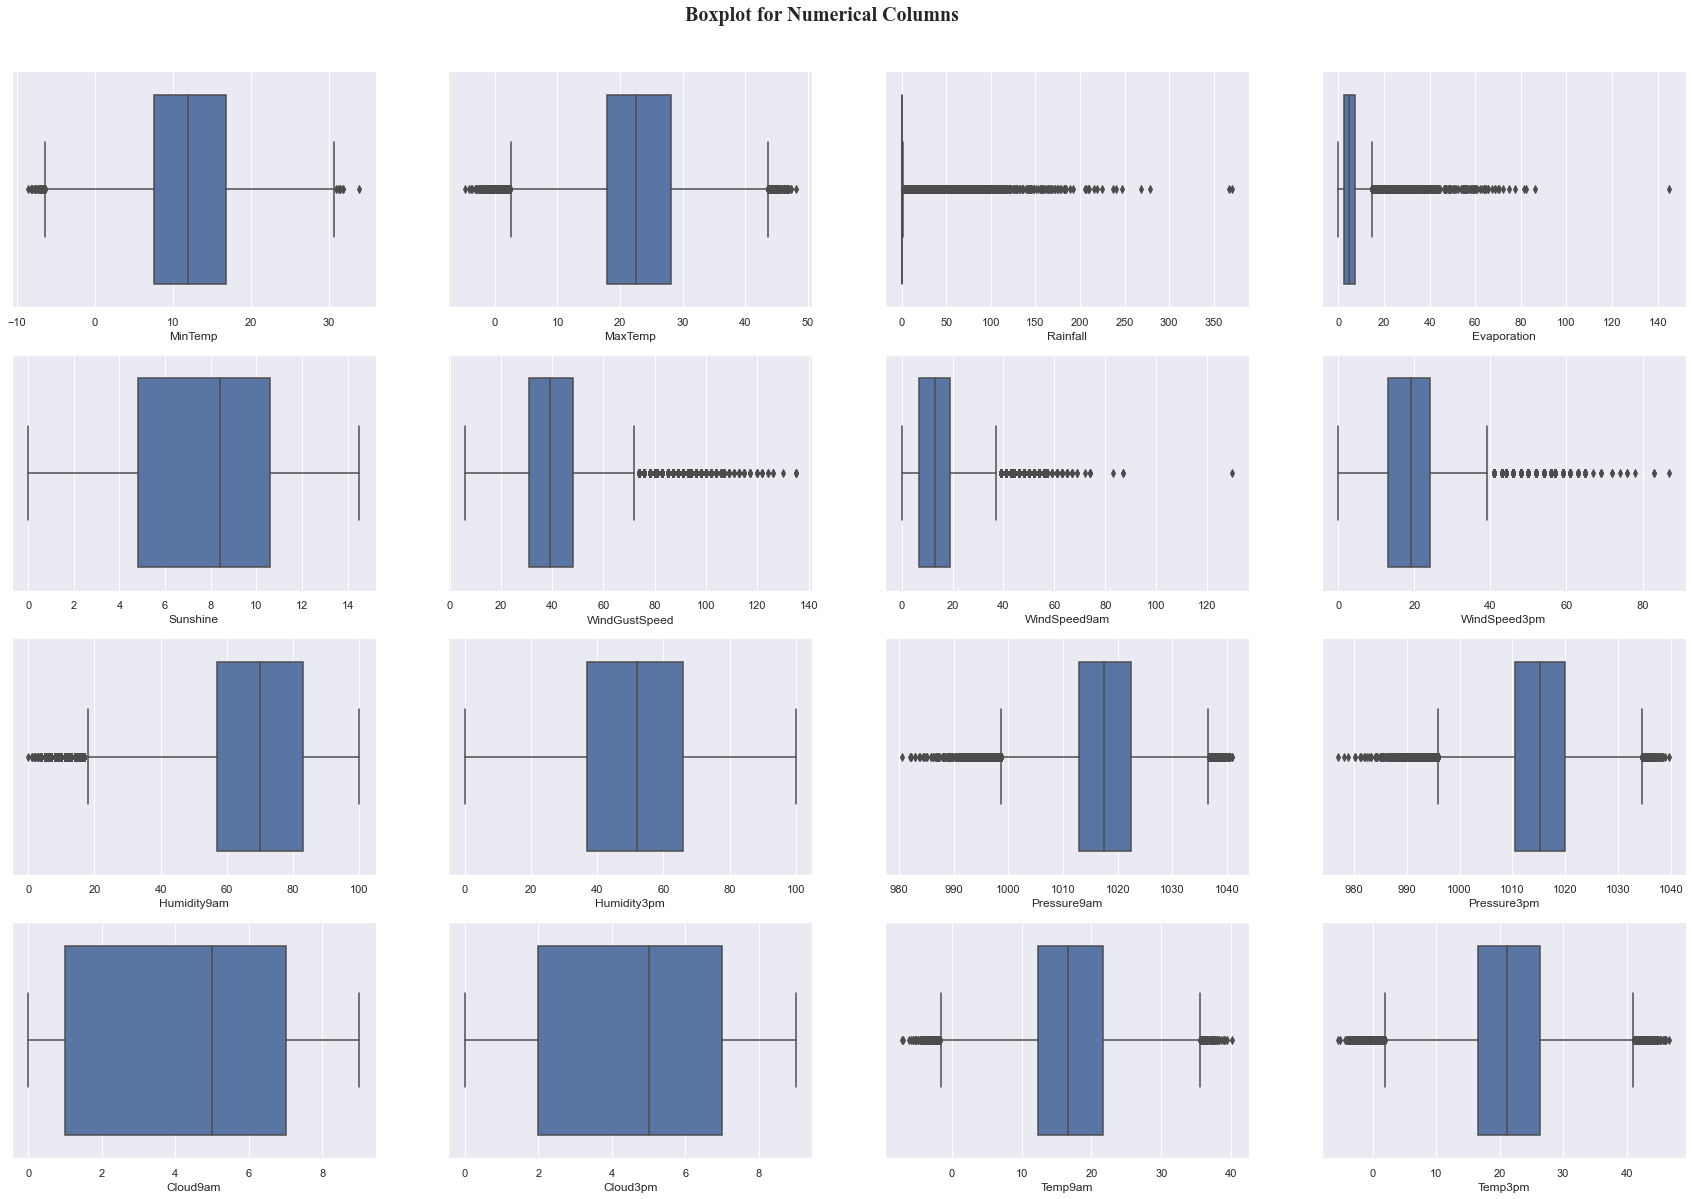

In [69]:
fig, axes = plt.subplots(4, 4, figsize=(30, 20))
for i, col in enumerate(df.select_dtypes('number').columns):
    sns.boxplot(data=df, x=col, ax=axes[i // 4, i % 4], orient='h')

fig.suptitle('Boxplot for Numerical Columns', fontsize=20, fontweight='bold', fontname='Times New Roman', y=0.925)
plt.show()

## I.3
Lakukan:
1. Pencarian korelasi antarfitur
2. Visualisasi distribusi setiap fitur (kategorikal dan kontinu)
3. Visualisasi distribusi setiap fitur per target (`RainTomorrow`)

In [ ]:
# I.3 Kode di sini.

## I.4
Lakukanlah analisis lebih lanjut jika diperlukan, kemudian lakukan hal berikut:
1. Penambahan fitur jika memungkinkan
2. Pembuangan fitur yang menurut kalian tidak dibutuhkan
3. Penanganan nilai hilang
4. Transformasi data kategorikal menjadi numerikal (_encoding_)
5. _Scaling_ dengan `MinMaxScaler`

In [ ]:
# I.4 Put your code here

# II. Desain Eksperimen
Tujuan dari bagian ini adalah peserta dapat memahami cara melakukan eksperimen mencari metode terbaik dengan benar. Hal yang diliputi adalah sebagai berikut:
1. Pembuatan model
2. Proses validasi
3. _Hyperparameter tuning_

## II.1
Tentukanlah metrik yang akan digunakan pada eksperimen kali ini. Metrik yang dapat lebih dari satu jenis.

(Tuliskan jawaban bagian II.1 di sini.)

## II.2 
Bagi data dengan perbandingan 0,8 untuk data latih dan 0,2 untuk data validasi.

In [ ]:
# II.2 Kode di sini

## II.3
Lakukan hal berikut:
1. Prediksi dengan menggunakan model _logistic regression_ sebagai _baseline_.
2. Tampilkan evaluasi dari model yang dibangun dari metrik yang ditentukan pada II.1
3. Tampilkan _confusion matrix_.

In [ ]:
# II.3 Kode di sini

## II.4 
Lakukanlah:
1. Pembelajaran dengan model lain
2. _Hyperparameter tuning_ untuk model yang dipakai dengan menggunakan _grid search_ (perhatikan _random factor_ pada beberapa algoritma model)
3. Validasi dengan _cross validation_


In [ ]:
# II.4 Kode di sini.

# III. Improvement
Pada bagian ini, kalian diharapkan dapat:
1. melakukan pelatihan dengan data hasil _oversampling_ / _undersampling_, disertai dengan validasi yang benar; serta
2. menerapkan beberapa metode untuk menggabungkan beberapa model.

Kedua hal ini adalah contoh metode untuk meningkatkan kinerja dari model.

## III.1
Lakukanlah:
1. _Oversampling_ pada kelas minoritas pada data latih
2. _Undersampling_ pada kelas mayoritas pada data latih

Pada setiap tahap, latih dengan model *baseline* (II.3), dan validasi dengan data validasi. Data latih dan validasi adalah data yang disusun pada bagian II.2.

In [ ]:
# III.1 Kode di sini.

## III.2
Lakukanlah:
1. Eksplorasi _soft voting_, _hard voting_, dan _stacking_.
2. Buatlah model _logistic regression_ dan SVM.
3. Lakukanlah _soft voting_ dari model-model yang dibangun pada poin 2.
4. Lakukan _hard voting_ dari model-model yang dibangun pada poin 2.
5. Lakukanlah _stacking_ dengan _final classifier_ adalah _logistic regression_ dari model-model yang dibangun pada poin 2.
6. Lakukan validasi dengan metrics yang telah ditentukan untuk poin 3, 4, dan 5.

(Tuliskan hasil eksplorasi III.2 poin 1 di sini.)

In [ ]:
# III.2 Kode di sini.  

# IV. Analisis
Bandingkan hasil dari hal-hal berikut:
1. Model _baseline_ (II.3)
2. Model lain (II.4)
3. Hasil _undersampling_
4. Hasil _oversampling_
5. Hasil _soft voting_
6. Hasil _hard voting_
7. Hasil _stacking_

(Tuliskan jawaban bagian IV di sini.)